In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore") 
import plotly as py
import plotly.graph_objs as go 
import os
py.offline.init_notebook_mode (connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [4]:
#import DataFrame
DF = pd.read_csv('/Users/theresalee/Desktop/World Energy Consumption.csv')

In [5]:
pd.set_option('display.max_columns', None)
DF.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508

In [6]:
#looks like need to clean the empty values
nulls = DF.isna().sum()
nulls

iso_code                   1802
country                       0
year                          0
coal_prod_change_pct       9987
coal_prod_change_twh       7038
                          ...  
wind_share_energy         13148
wind_cons_change_twh      13225
wind_consumption          13142
wind_elec_per_capita      11933
wind_energy_per_capita    13142
Length: 122, dtype: int64

In [7]:
#GDP does not make sense to replace the null values with a 0, so let's try FWD fill and then backwards fill
nulls = DF.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        DF[i].ffill(inplace= True)
        DF[i].bfill(inplace = True)
DF.isna().sum()

iso_code                  0
country                   0
year                      0
coal_prod_change_pct      0
coal_prod_change_twh      0
                         ..
wind_share_energy         0
wind_cons_change_twh      0
wind_consumption          0
wind_elec_per_capita      0
wind_energy_per_capita    0
Length: 122, dtype: int64

In [8]:
df_filtered = DF[DF['country'] != 'World']
group_gdp= df_filtered.groupby ('country')['population'].sum()
top_gdp = group_gdp.nlargest(10)
print(top_gdp)

country
China             9.793169e+10
India             7.255637e+10
Europe            7.229664e+10
Africa            5.146811e+10
Europe (other)    4.109506e+10
North America     2.458263e+10
United States     2.313569e+10
Middle East       1.530912e+10
Indonesia         1.402029e+10
Russia            1.372809e+10
Name: population, dtype: float64


In [9]:
#Filter on columns required
DF = DF[['country', 'year', 'electricity_generation', 'biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'population', 'gdp', 'energy_per_gdp', 'energy_per_capita', 'fossil_share_elec', 'gas_share_elec', 'gas_production', 'low_carbon_share_elec', 'oil_production']]

#Filter on year >=1990
DF = DF[DF['year'] >=1990]

#Filter on countries
Countries = ['Egypt','Saudi Arabia', 'United Kingdom', 'France', 'Germany', 'United States', 'Japan', 'India']

#Filter columns
DF = DF.loc[DF['country'].isin(Countries)]

DF.head(3)

,country,year,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,renewables_electricity,solar_electricity,wind_electricity,population,gdp,energy_per_gdp,energy_per_capita,fossil_share_elec,gas_share_elec,gas_production,low_carbon_share_elec,oil_production
4951,Egypt,1990,41.952,0.455,0.0,32.000,16.446,9.953,0.0,15.554,9.953,0.0,0.0,56134000.0,2.530000e+11,1.560,7031.142,76.276,39.201,77.674,23.724,528.294
4952,Egypt,1991,43.276,0.455,0.0,33.360,20.406,9.916,0.0,12.954,9.916,0.0,0.0,57425000.0,2.610000e+11,1.532,6962.011,77.087,47.154,87.395,22.913,527.354
4953,Egypt,1992,44.987,0.455,0.0,35.187,22.944,9.800,0.0,12.242,9.800,0.0,0.0,58667000.0,2.690000e+11,1.484,6805.716,78.216,51.003,94.518,21.784,533.937


## 4. Selecting the colour scheme

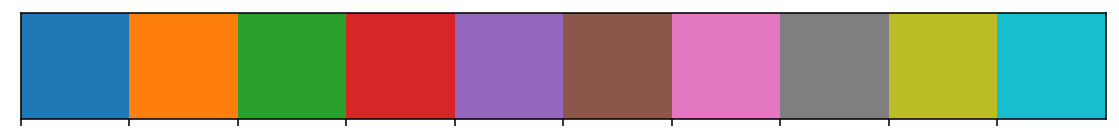

In [10]:
palette = "tab10"
sns.set_palette(palette)
sns.palplot(sns.color_palette(palette))
plt.show()

## GDP VS Population Trends

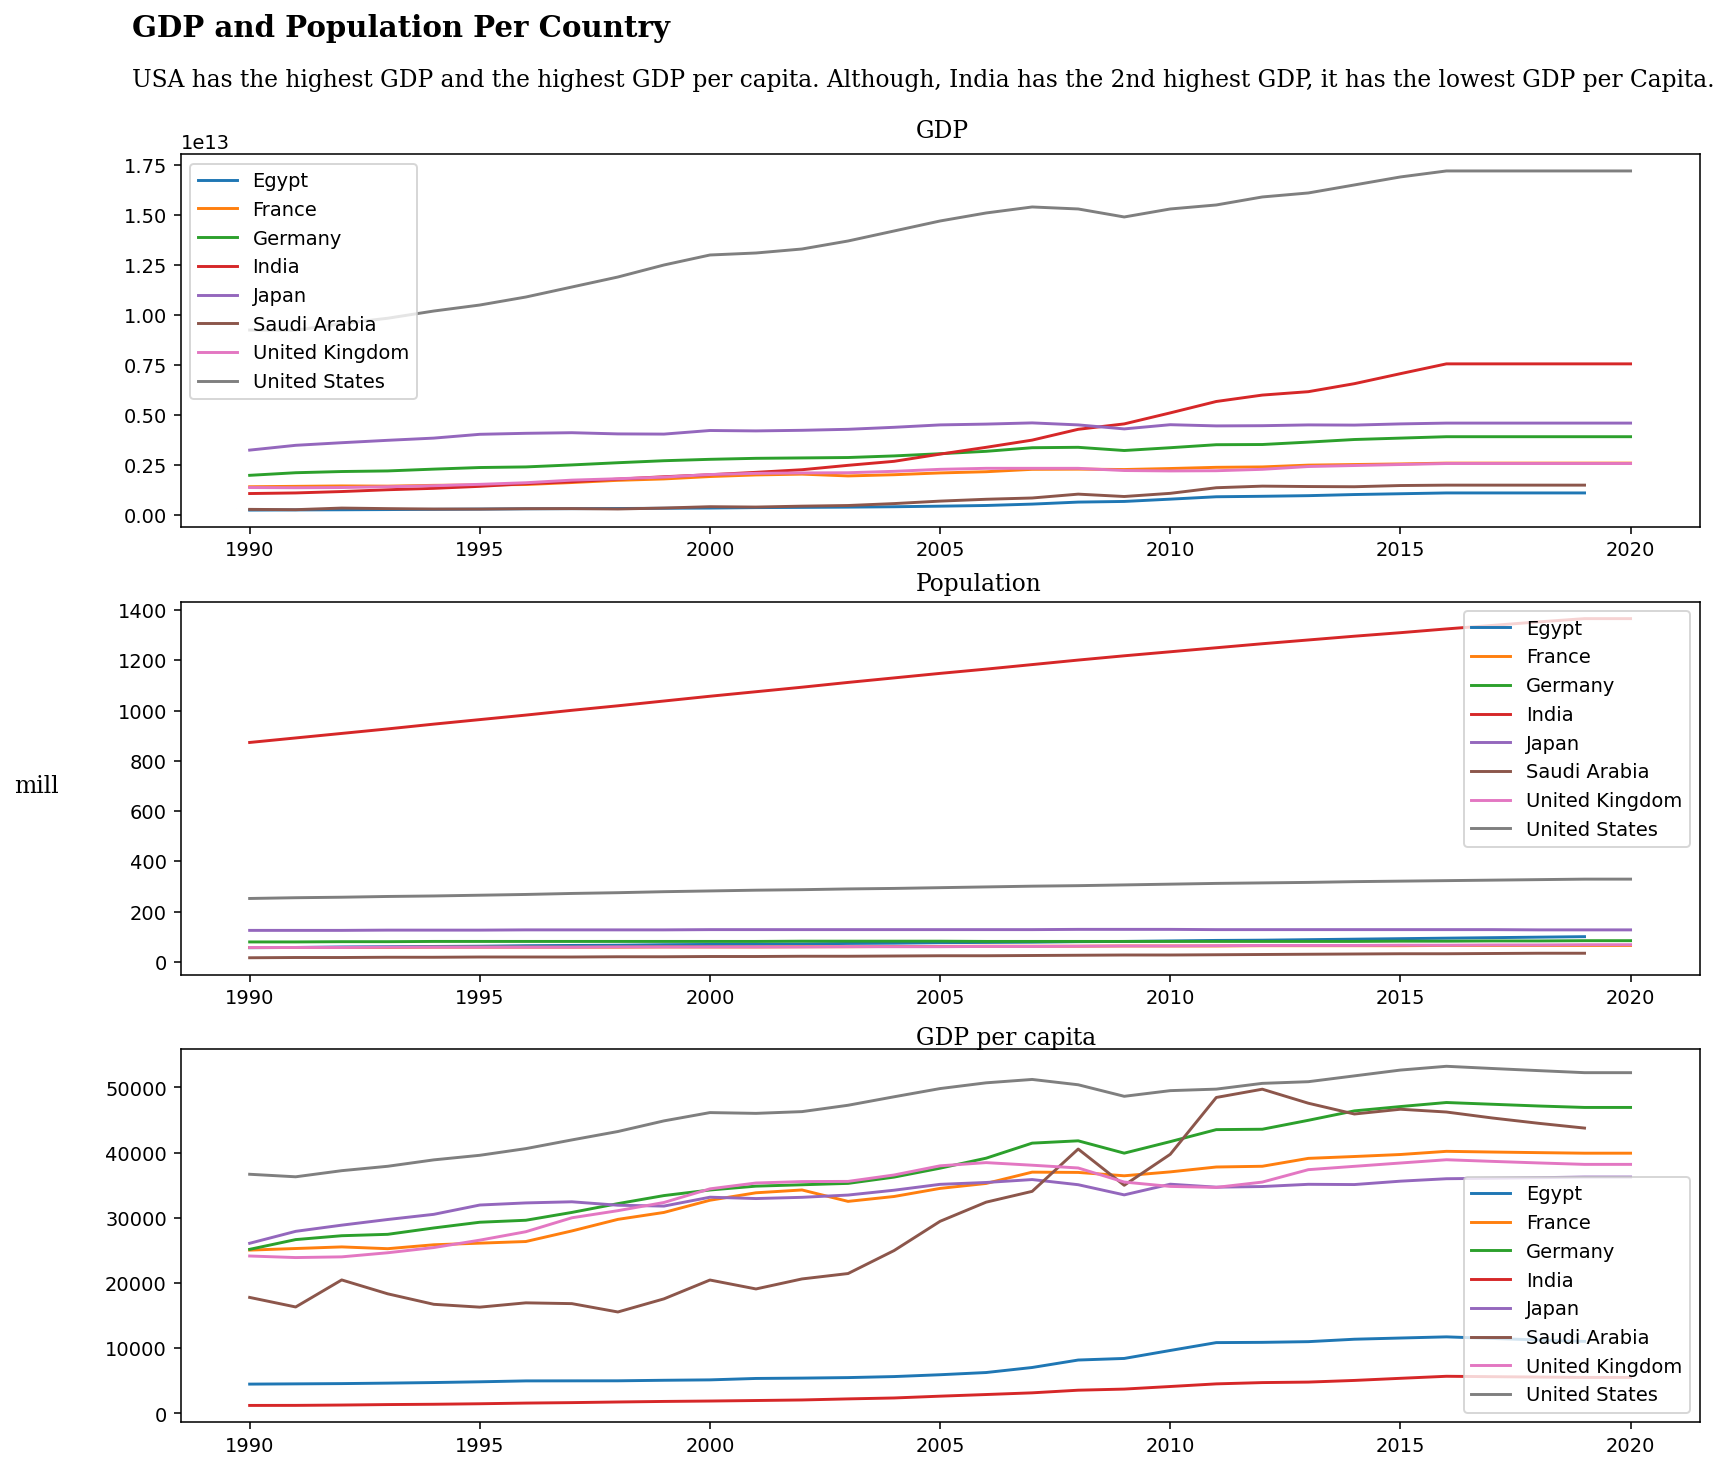

In [11]:
# Plot the dgp, population, and gdp per capital  

DF_gdp = DF.groupby(['year', 'country'])['gdp'].sum().unstack('country')
DF_popu = DF.groupby (['year', 'country'])['population'].sum().unstack ('country')
DF_popu_mil = round (DF_popu/1000000) 
DF['gdp_per_capita'] = round (DF['gdp']/DF['population']) 
DF_gdp_per_capita = DF.groupby(['year', 'country'])['gdp_per_capita'].sum().unstack('country')

fig, ax = plt.subplots(3,1, figsize = (14, 12))
ax[0].plot(DF_gdp,label=DF_gdp.columns) 
ax[0].legend()
ax[1].plot(DF_popu_mil,label=DF_popu_mil.columns)
ax[1].legend() 
ax[2].plot(DF_gdp_per_capita,label=DF_gdp_per_capita.columns)
ax[2].legend()

fig.text(0.1, 0.95, 'GDP and Population Per Country', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92,
         '''USA has the highest GDP and the highest GDP per capita. Although, India has the 2nd highest GDP, it has the lowest GDP per Capita.''',
         fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.04, 0.5, '''mill''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.89, '''GDP''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.62, '''Population''', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.35, '''GDP per capita''', fontsize=12, fontweight='light', fontfamily='serif')
         
plt.show()


## Slicing through the year for 2000-2005 vs 2010-2015. 

%Changes in GDP, Population and GDP per Capita

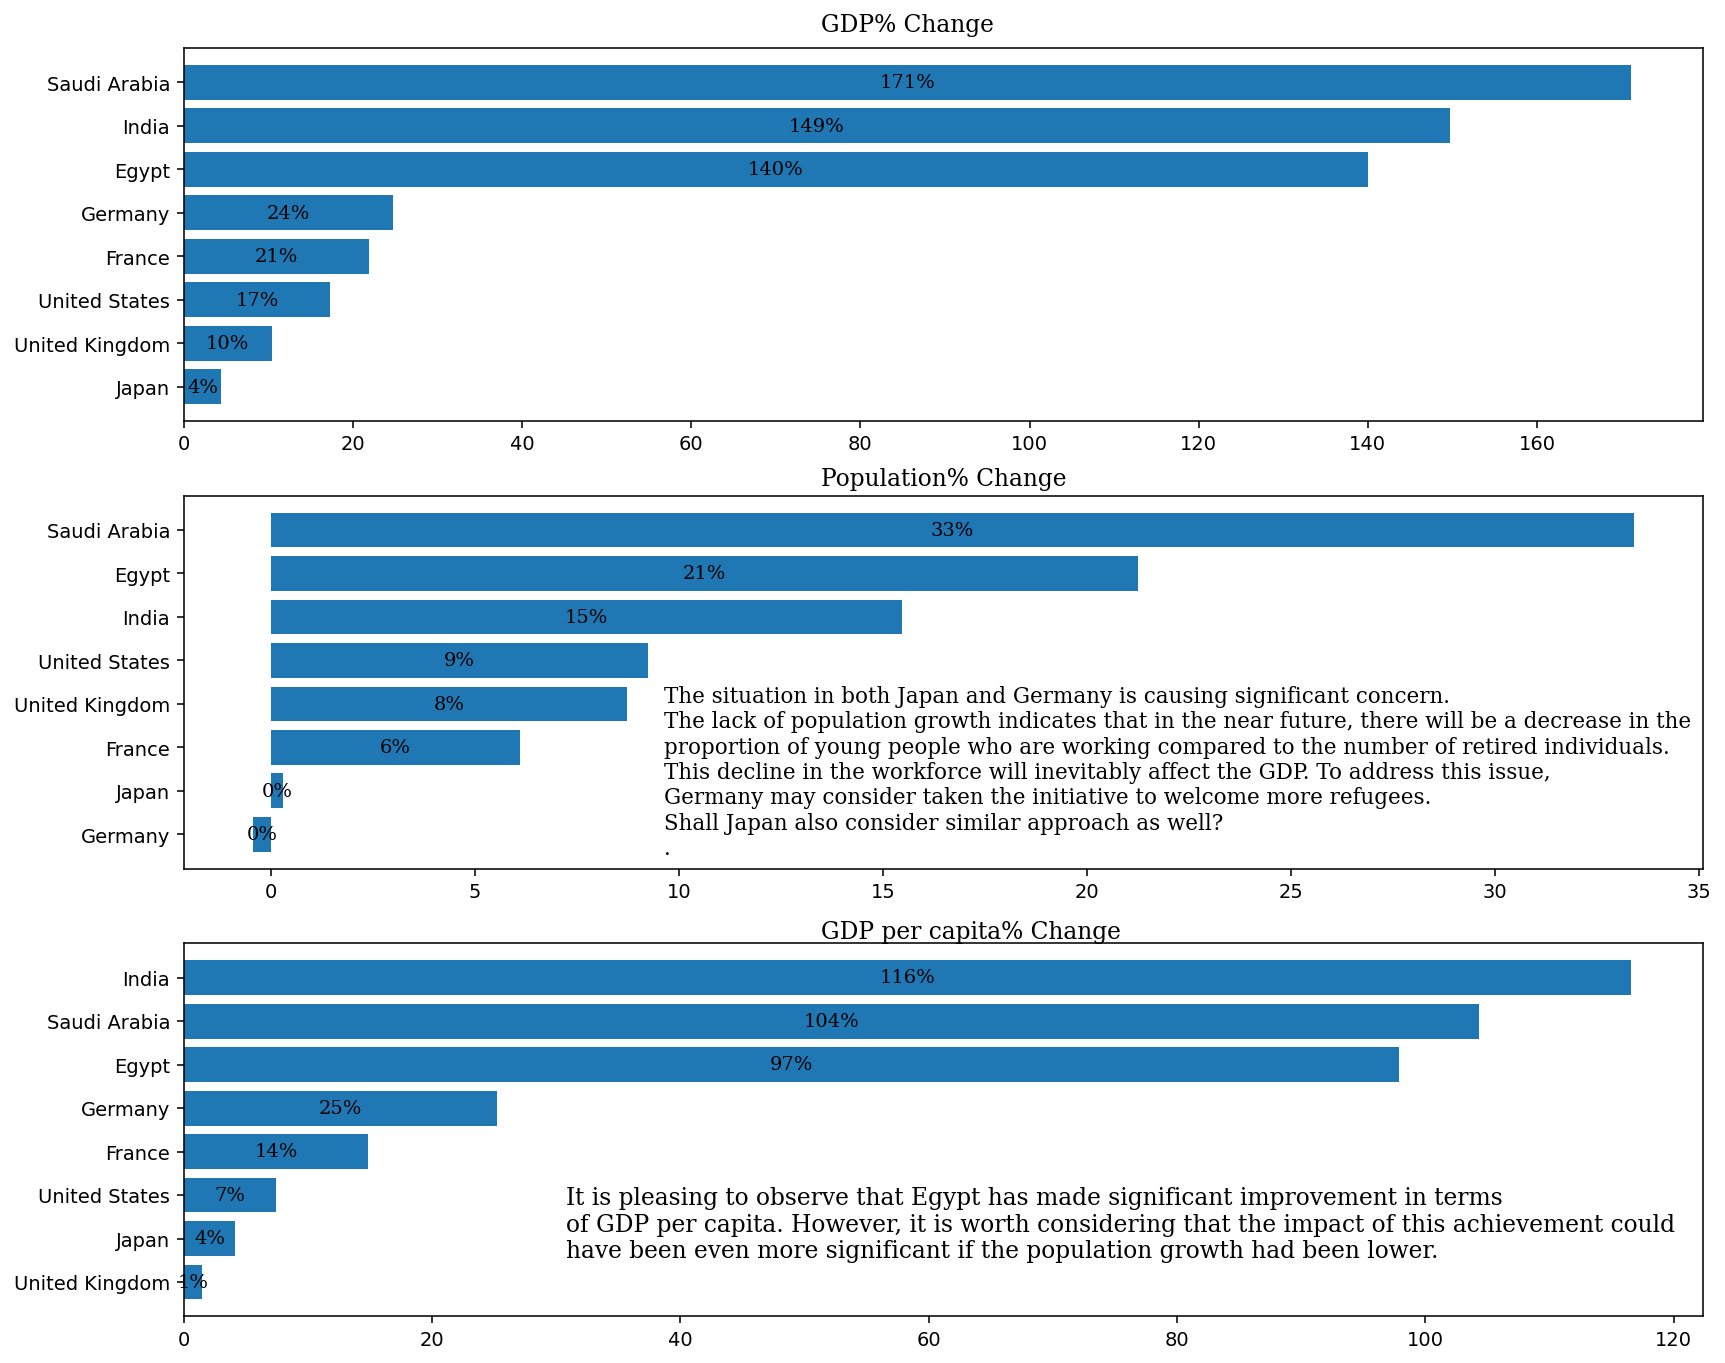

In [12]:
#We will create a comparison between the cannges in gdp and population per country in the durations 2000-2005 and 2010-2015.
#gdp % increase

DF_comparison = pd.DataFrame() 
DF_comparison ['DF_2000_2005_gdp'] = DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['gdp'].mean()
DF_comparison ['DF_2010_2015_gdp'] = DF[(DF['year'] >=2010) & (DF['year'] <=2015)].groupby('country')['gdp'].mean()
DF_comparison ['gdp_difference%'] = 100 * (DF_comparison['DF_2010_2015_gdp'] - DF_comparison['DF_2000_2005_gdp'])/DF_comparison['DF_2000_2005_gdp'] 
DF_comparison.sort_values('gdp_difference%',ascending=True,inplace=True)
                                           
fig, ax = plt.subplots(3,1 , figsize = (14,12)) 

ax[0].barh(DF_comparison.index, DF_comparison['gdp_difference%']) 
for i in DF_comparison.index:
    ax[0].annotate(f"{int(DF_comparison['gdp_difference%'][i])}%",               
                   xy = (DF_comparison['gdp_difference%'][i]/2, i), 
                   va = 'center', ha = 'center', fontsize=10, fontweight = 'light'
                   , fontfamily = 'serif', color = 'black')
#popu % increase                   

DF_comparison['DF_2000_2005_popu'] = DF[(DF['year'] >=2000)&(DF['year']<=2005)].groupby('country')['population'].mean()                                           
DF_comparison['DF_2010_2015_popu'] = DF[(DF['year'] >=2010)&(DF['year']<=2015)].groupby('country')['population'].mean()                                           
DF_comparison['popu_difference%'] = 100 * (DF_comparison['DF_2010_2015_popu'] - DF_comparison['DF_2000_2005_popu'])/DF_comparison['DF_2000_2005_popu']
DF_comparison.sort_values('popu_difference%', ascending= True, inplace = True)
DF_comparison.head()
                                          
ax[1].barh(DF_comparison.index, DF_comparison ['popu_difference%'])                                       

for i in DF_comparison.index:
    ax[1].annotate(f"{int(DF_comparison['popu_difference%'][i])}%",
                   xy = (DF_comparison['popu_difference%'][i]/2,i),
                   va = 'center', ha = 'center', fontsize= 10, fontweight='light',
                   fontfamily='serif', color = 'black')
    
#gdp per capita
                                          
DF_comparison['DF_2000_2005_gpercapita']= DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['gdp_per_capita'].mean()
DF_comparison['DF_2010_2015_gpercapita']= DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp_per_capita'].mean()
DF_comparison['gpercapita_difference%'] = 100 * (DF_comparison['DF_2010_2015_gpercapita'] - DF_comparison['DF_2000_2005_gpercapita']) / DF_comparison['DF_2000_2005_gpercapita']
DF_comparison.sort_values('gpercapita_difference%',ascending=True,inplace = True)
                                          
ax[2].barh(DF_comparison.index, DF_comparison['gpercapita_difference%'])                                          

for i in DF_comparison.index:
    ax[2].annotate(f"{int(DF_comparison['gpercapita_difference%'][i])}%",
                   xy=(DF_comparison['gpercapita_difference%'][i]/2,i), 
                   va='center', ha = 'center', fontsize=10, fontweight='light',
                   fontfamily='serif', color = 'black')
                                           
fig.text(0.45, 0.89,'''GDP% Change''', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.45, 0.62,'''Population% Change''', fontsize=12, fontweight='light', fontfamily='serif')
    
fig.text(0.45, 0.35, '''GDP per capita% Change''', fontsize=12, fontweight='light', fontfamily='serif')
                                          
fig.text(0.37, 0.4, '''The situation in both Japan and Germany is causing significant concern. 
The lack of population growth indicates that in the near future, there will be a decrease in the 
proportion of young people who are working compared to the number of retired individuals. 
This decline in the workforce will inevitably affect the GDP. To address this issue, 
Germany may consider taken the initiative to welcome more refugees. 
Shall Japan also consider similar approach as well? 
.''', fontsize=11, fontweight = 'light', fontfamily='serif')
                                          
fig.text(0.32, 0.16, '''It is pleasing to observe that Egypt has made significant improvement in terms 
of GDP per capita. However, it is worth considering that the impact of this achievement could 
have been even more significant if the population growth had been lower.'''
, fontsize=12, fontweight='light', fontfamily='serif')
                                          
plt.show()                                

### Electricity source distribution in Japan

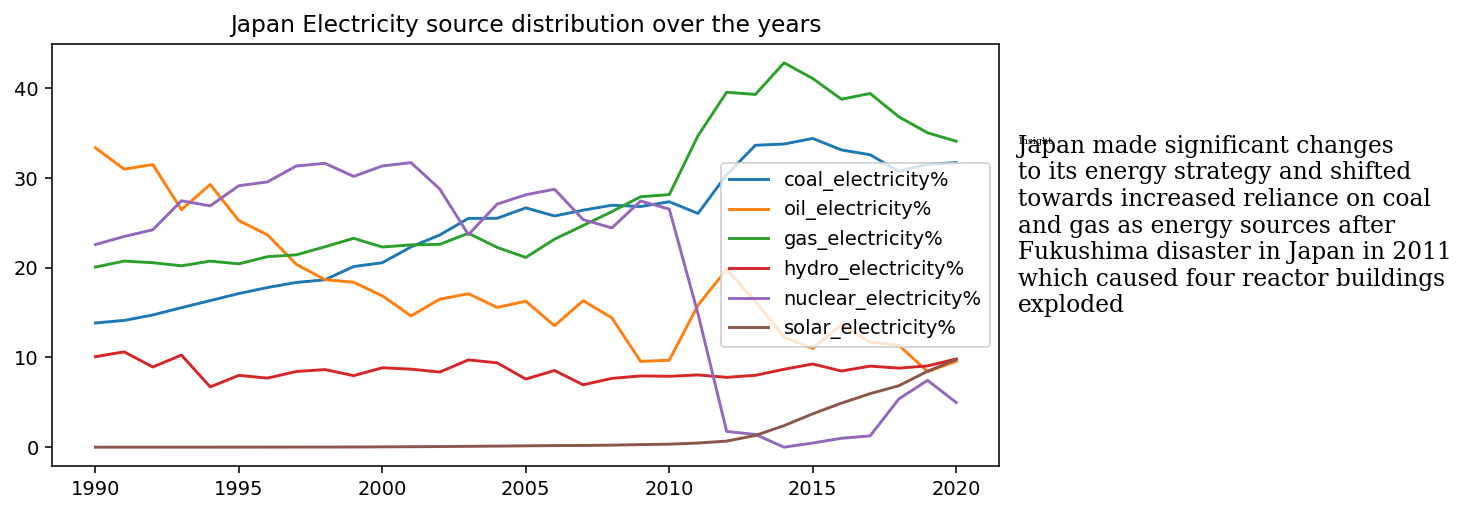

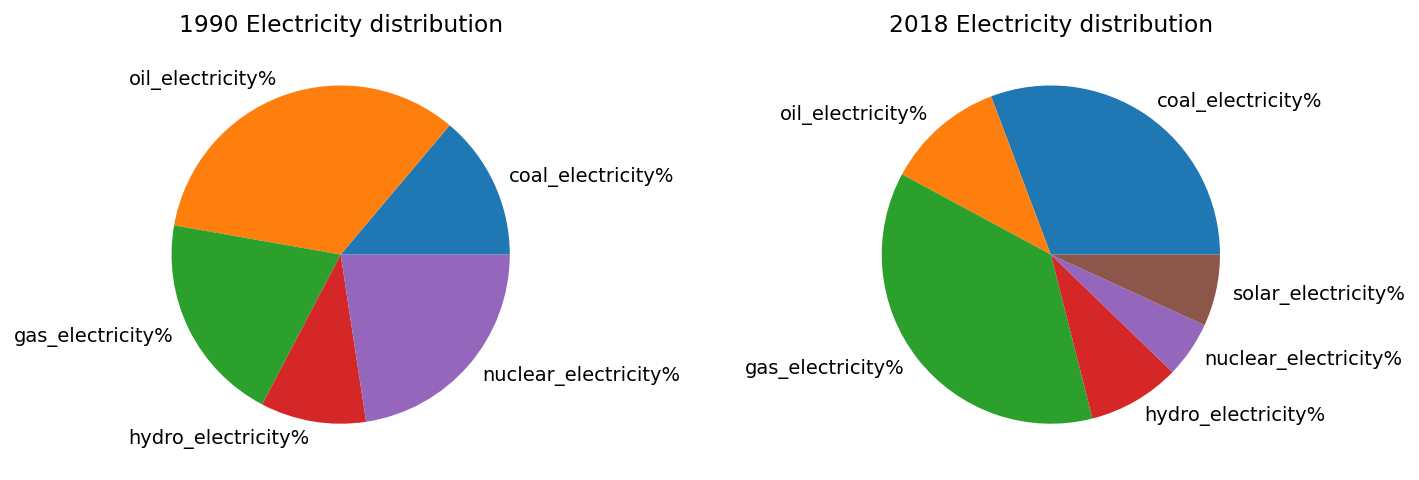

In [13]:
Parse = ['coal_electricity', 'oil_electricity', 'gas_electricity', 'hydro_electricity', 
         'nuclear_electricity', 'solar_electricity']
DF['total'] = DF[Parse].sum(axis=1)
DF_Electricity = DF[['year', 'country']]

for i in Parse: 
    DF_Electricity[f"{i}%"] = round(100 * (DF[i] / DF['total']), 4)

# Plot the change in the percentage over the years
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [4, 1]})

chart_DF = DF_Electricity[DF_Electricity['country'] == 'Japan'].groupby('year').mean()
ax[0].plot(chart_DF, label=chart_DF.columns)
ax[0].set_title("Japan Electricity source distribution over the years")
ax[0].legend()
ax[1].axis('off')

fig.text(0.7, 0.7, 'Insight', fontsize=5, fontweight='light', fontfamily='serif')
fig.text(0.7, 0.4, '''Japan made significant changes 
to its energy strategy and shifted 
towards increased reliance on coal 
and gas as energy sources after 
Fukushima disaster in Japan in 2011 
which caused four reactor buildings 
exploded''', fontsize=12, fontweight='light', fontfamily='serif')

# Plot the pie charts for energy distribution and compare 1990 VS 2018 with drop the columns with zero values and not affect the labeling
years = [1990, 2018]
count = 0

fig2, ay = plt.subplots(1, 2, figsize=(12, 4))

for y in years:
    chart_DF_pie_1 = chart_DF[(chart_DF.index.values == y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i] < 1:
            chart_DF_pie_1.drop(columns=[i], axis=1, inplace=True)
    
    ay[count].pie(chart_DF_pie_1.iloc[0].values, labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Electricity distribution")
    count = count + 1

plt.show()


### Electricty source distribution in Germany

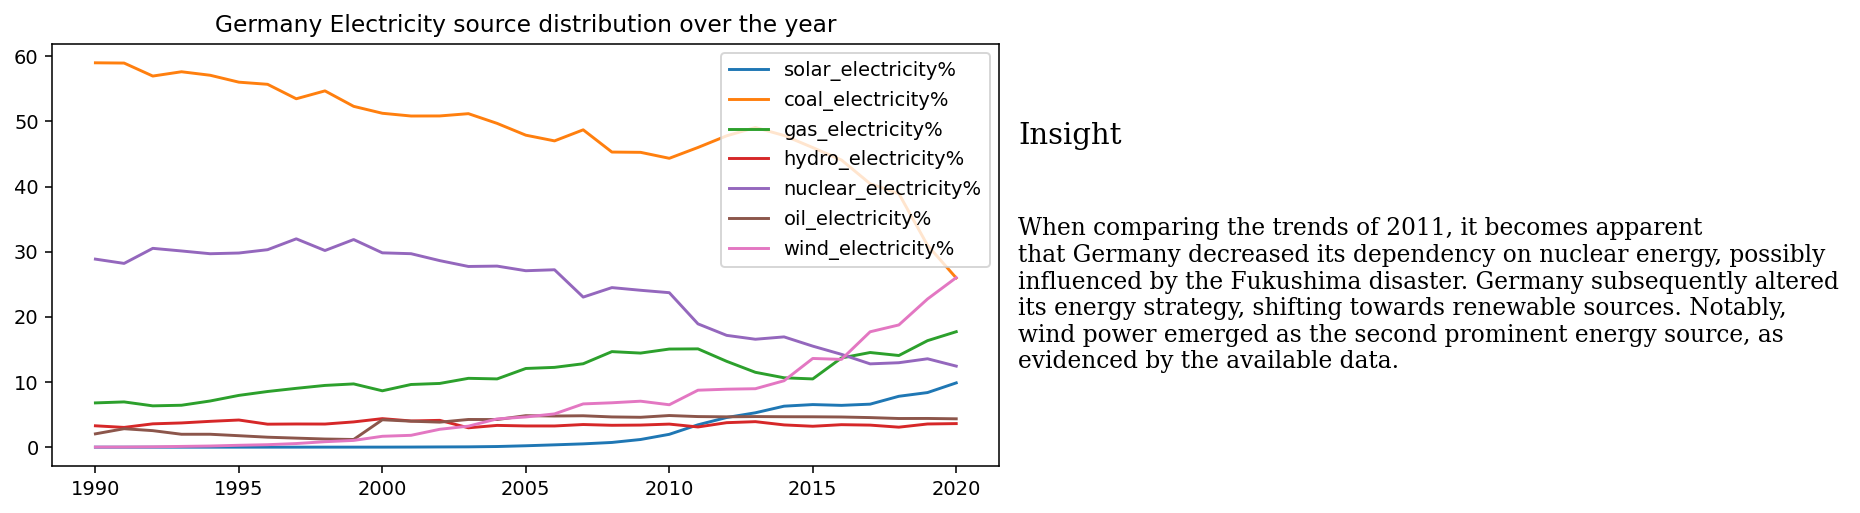

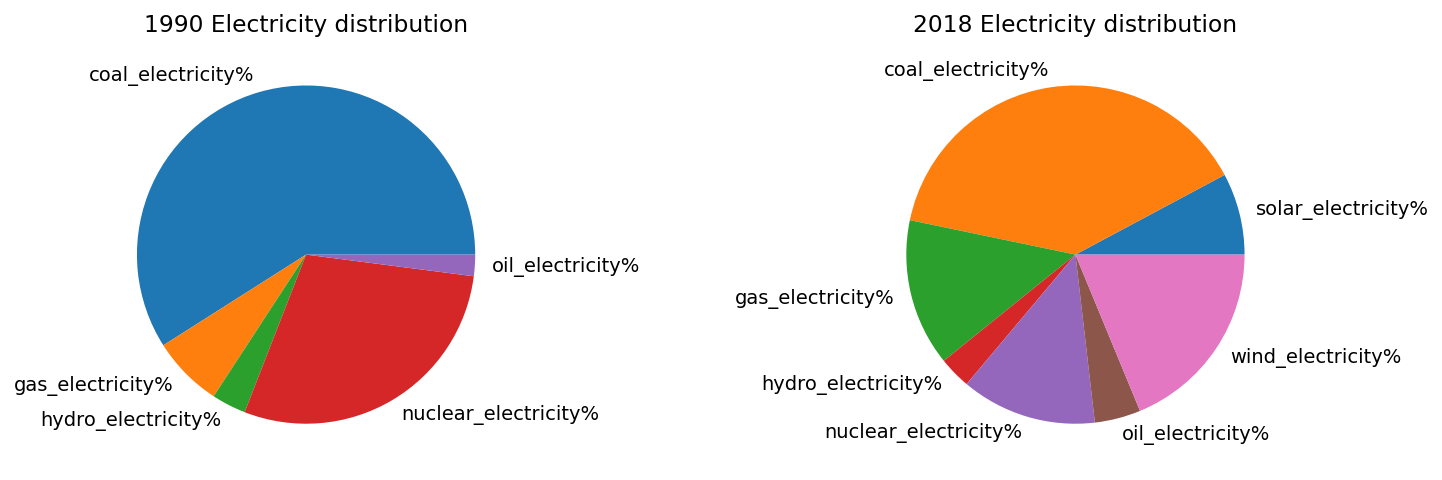

In [14]:
# get the % share of electricity from total energy sources #
Parse=['solar_electricity','coal_electricity','gas_electricity', 
      'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'wind_electricity']
DF['total']=DF[Parse].sum(axis=1) 
DF_Electricity=DF[['year','country']] 

for i in Parse: 
    DF_Electricity[f"{i}%"]= round (100*(DF[i]/DF['total']),4)            

## plot the change in the percentage over the years ##

fig3, ax3 = plt.subplots (1, 2, figsize= (12, 4), gridspec_kw = {'width_ratios':[4,1]})
chart_DF = DF_Electricity[DF_Electricity ['country']=='Germany'].groupby('year').mean()
ax3[0].plot(chart_DF,label = chart_DF.columns) 
ax3[0].set_title("Germany Electricity source distribution over the year")
ax3[0].legend()
ax3[1].axis('off')
fig3.text(0.7,0.7,'Insight', fontsize=15, fontweight='light', fontfamily='serif')
fig3.text(0.7, 0.3,'''When comparing the trends of 2011, it becomes apparent 
that Germany decreased its dependency on nuclear energy, possibly 
influenced by the Fukushima disaster. Germany subsequently altered 
its energy strategy, shifting towards renewable sources. Notably, 
wind power emerged as the second prominent energy source, as 
evidenced by the available data.''', 
fontsize = 12, fontweight='light', fontfamily='serif')

years = [1990, 2018] 
count = 0 
fig4,ay2 = plt.subplots(1,2, figsize=(13,4))
for y in years: 
    chart_DF_pie_1 = chart_DF[(chart_DF.index.values == y)] 

    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i] <1:
            chart_DF_pie_1.drop(columns = [i], axis = 1, inplace = True)
    ay2[count].pie(chart_DF_pie_1.iloc[0].values,labels = chart_DF_pie_1.columns)
    ay2[count].set_title(f"{int(y)} Electricity distribution") #rmb space before }
    count = count +1 

plt.show()